# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [54]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [55]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API")

In [56]:
# Create a newsapi client
from newsapi import NewsApiClient 
newsapi = NewsApiClient(api_key=api_key)

In [57]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q='bitcoin', language='en', page_size=100, sort_by='relevancy')
#btc_news

In [58]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q='ethereum', language='en', page_size=100, sort_by='relevancy')
#eth_news

In [59]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
btc_sentiment_df = pd.DataFrame(btc_sentiments)

In [60]:
# Reorder columns
columns = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_sentiment_df = btc_sentiment_df[columns]

btc_sentiment_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
1,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
2,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
3,2021-07-23,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873
4,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836


In [61]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
eth_sentiment_df = pd.DataFrame(eth_sentiments)

In [62]:
# Reorder columns
columns = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_sentiment_df = eth_sentiment_df[columns]


eth_sentiment_df.tail()

,date,text,compound,positive,negative,neutral
95,2021-07-20,"Will it go back up? Probably, but for Bitcoin ...",0.4497,0.101,0.046,0.853
96,2021-07-13,When you think of a cryptocurrency mining farm...,0.4767,0.094,0.000,0.906
97,2021-07-21,"English artist Damien Hirst’s latest project, ...",0.0000,0.000,0.000,1.000
98,2021-07-22,Bitcoin and other cryptocurrencies rose on Wed...,0.0000,0.000,0.000,1.000
99,2021-07-05,"Coinbase(NASDAQ:COIN), America's leading crypt...",0.0000,0.000,0.000,1.000


In [63]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.076877,0.056650,0.035910,0.907420
std,0.386568,0.066506,0.059177,0.085376
min,-0.827100,0.000000,0.000000,0.653000
25%,-0.051600,0.000000,0.000000,0.856750
50%,0.000000,0.048500,0.000000,0.910500
75%,0.345300,0.092000,0.068250,1.000000
max,0.883400,0.276000,0.287000,1.000000


In [64]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.140518,0.050630,0.019590,0.929760
std,0.325533,0.058933,0.042655,0.071053
min,-0.812600,0.000000,0.000000,0.714000
25%,0.000000,0.000000,0.000000,0.877500
50%,0.000000,0.000000,0.000000,0.930000
75%,0.406800,0.093250,0.000000,1.000000
max,0.771700,0.194000,0.249000,1.000000


0.056650### Questions:

Q: Which coin had the highest mean positive score?

A: based on the previous results, bitcoin had the highest mean positive score of 0.056650

Q: Which coin had the highest compound score?

A: based on the previous results, bitcoin had the highest compound score of 0.883400

Q. Which coin had the highest positive score?

A: based on the previous results,bitcoin had the highest positive score of 0.276000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [65]:


from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [66]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer() 

# Create a list of stopwords
stopwords = set(stopwords.words("english"))

# Expand the default stopwords list if necessary


In [67]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    text_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    tk_words = word_tokenize(text_clean)
    
    # Lemmatize words into root words
    lem_words = [lemmatizer.lemmatize(word) for word in tk_words]
   
    # Convert the words to lowercase
    lower_words = [word.lower() for word in lem_words]
    
    # Remove the stop words
    tokens = [word for word in lower_words if word not in stopwords]
    
    return tokens

In [68]:
# Create a new tokens column for Bitcoin
btc_sentiment_df["Tokens"] = [tokenizer(text) for text in btc_sentiment_df["text"]]
btc_sentiment_df

,date,text,compound,positive,negative,neutral,Tokens
0,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,..."
1,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[filed, underthe, supply, chain, attack, ha, r..."
2,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857,"[image, copyrightgetty, imagesthe, gang, behin..."
3,2021-07-23,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873,"[get, roundup, techcrunchs, biggest, important..."
4,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
...,...,...,...,...,...,...,...
95,2021-07-15,The cryptocurrency bitcoin now uses up more el...,0.2732,0.063,0.000,0.937,"[cryptocurrency, bitcoin, us, electricity, yea..."
96,2021-07-21,This article was translated from our Spanish e...,0.0000,0.067,0.067,0.866,"[article, wa, translated, spanish, edition, us..."
97,2021-07-21,Personal Finance Insider writes about products...,0.5346,0.158,0.000,0.842,"[personal, finance, insider, writes, product, ..."
98,2021-07-22,"South Korean won, Chinese yuan and Japanese ye...",0.5719,0.101,0.000,0.899,"[south, korean, chinese, yuan, japanese, yen, ..."


In [69]:
# Create a new tokens column for Ethereum
eth_sentiment_df["Tokens"] = [tokenizer(text) for text in eth_sentiment_df["text"]]
eth_sentiment_df

,date,text,compound,positive,negative,neutral,Tokens
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925,"[many, blockchain, platform, competing, invest..."
1,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
2,2021-07-27,Cryptocurrencies spiked Monday after Amazon li...,0.3400,0.105,0.000,0.895,"[cryptocurrencies, spiked, monday, amazon, lis..."
3,2021-07-02,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849,"[bitcoin, ethereumyuriko, nakaoether, overtook..."
4,2021-07-17,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843,"[anthony, di, iorio, cofounder, ethereum, netw..."
...,...,...,...,...,...,...,...
95,2021-07-20,"Will it go back up? Probably, but for Bitcoin ...",0.4497,0.101,0.046,0.853,"[go, back, probably, bitcoin, investor, defini..."
96,2021-07-13,When you think of a cryptocurrency mining farm...,0.4767,0.094,0.000,0.906,"[think, cryptocurrency, mining, farm, might, p..."
97,2021-07-21,"English artist Damien Hirst’s latest project, ...",0.0000,0.000,0.000,1.000,"[english, artist, damien, hirsts, latest, proj..."
98,2021-07-22,Bitcoin and other cryptocurrencies rose on Wed...,0.0000,0.000,0.000,1.000,"[bitcoin, cryptocurrencies, rose, wednesday, e..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [70]:
from collections import Counter
from nltk import ngrams

In [71]:
# change the btc_sentiment_df.token to list of strings
btc_senttment_list = [item for lists in btc_sentiment_df.Tokens.tolist() for item in lists]
# Generate the Bitcoin N-grams where N=2
btc_ngrams = ngrams(btc_senttment_list, n=2)

In [72]:
# Generate the Ethereum N-grams where N=2
# change the btc_sentiment_df.token to list of strings
eth_senttment_list = [item for lists in eth_sentiment_df.Tokens.tolist() for item in lists]
# Generate the Ethereum N-grams where N=2
eth_ngrams = ngrams(eth_senttment_list, n=2)

In [73]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [74]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_ngrams,10)

[(('july', 'reuters'), 18),
 (('virtual', 'currency'), 11),
 (('illustration', 'taken'), 10),
 (('illustration', 'picture'), 10),
 (('taken', 'june'), 8),
 (('currency', 'bitcoin'), 7),
 (('char', 'reuters'), 7),
 (('picture', 'taken'), 7),
 (('char', 'representations'), 7),
 (('reuters', 'bitcoin'), 6)]

In [75]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_ngrams,10)

[(('taken', 'june'), 20),
 (('illustration', 'taken'), 20),
 (('bitcoin', 'ethereum'), 15),
 (('cryptocurrencies', 'bitcoin'), 13),
 (('ethereum', 'dogecoin'), 13),
 (('char', 'representations'), 13),
 (('june', 'reutersdado'), 13),
 (('representations', 'cryptocurrencies'), 12),
 (('dogecoin', 'ripple'), 12),
 (('ripple', 'litecoin'), 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

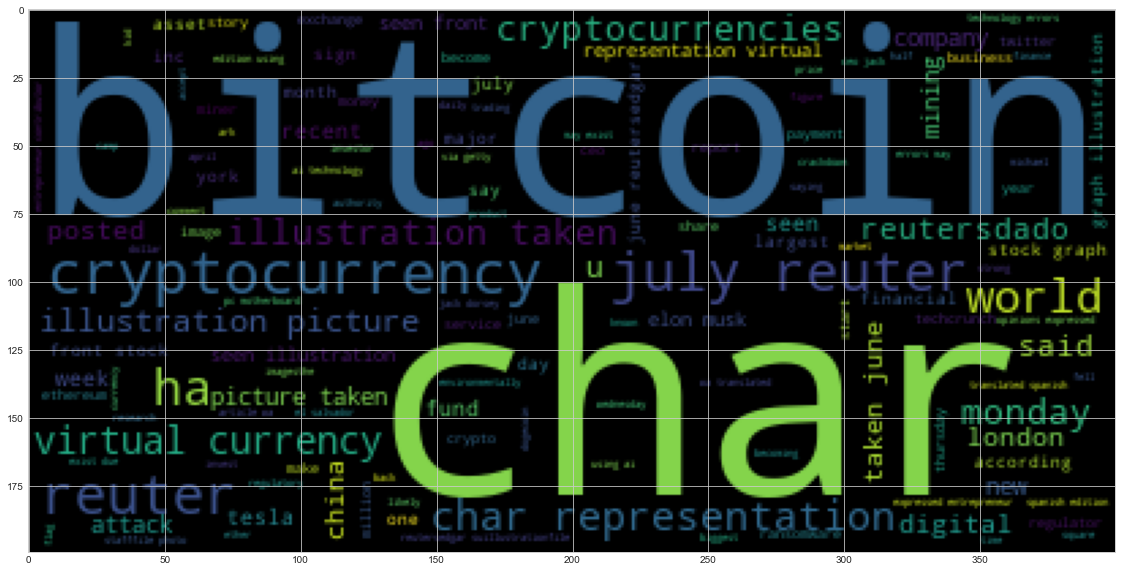

In [77]:
# Generate the Bitcoin word cloud

# empty string to store text from btc_sentiment_df
btc_string = " ".join(btc_sentiment_df["text"])

# tokenize the btc string for wordcloud
tk_btc_string = tokenizer(btc_string)

#creat a input string of tokenized text
wordcloud_input = " ".join(tk_btc_string)

#input tokenized text to word cloud
word_cloud = WordCloud().generate(wordcloud_input)
plt.imshow(word_cloud)

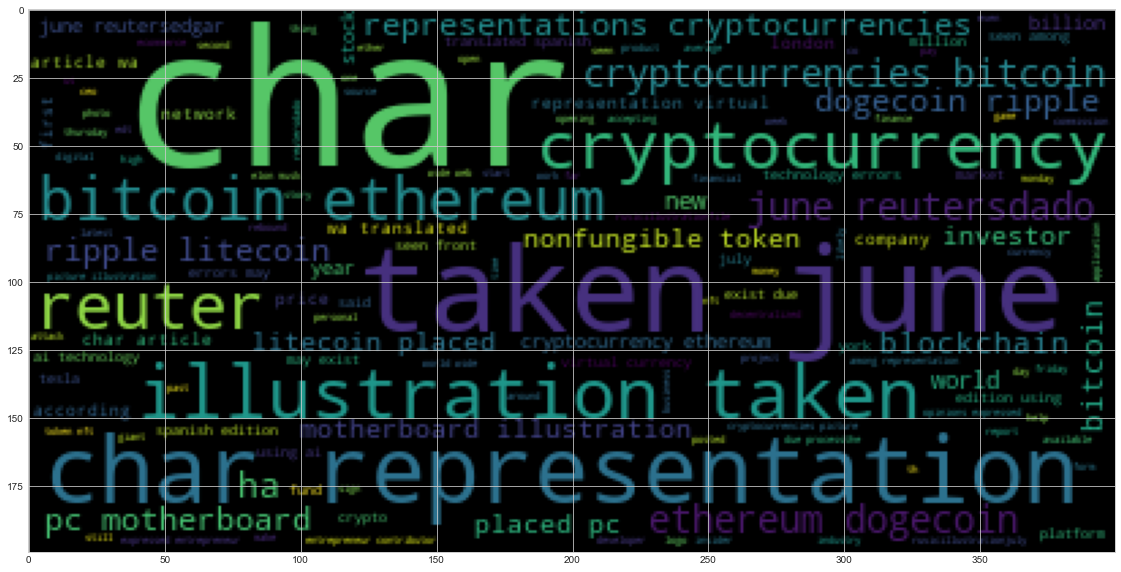

In [78]:
# Generate the Ethereum word cloud

# empty string to store text from btc_sentiment_df
eth_string = " ".join(eth_sentiment_df["text"])

# tokenize the btc string for wordcloud
tk_eth_string = tokenizer(eth_string)

#creat a input string of tokenized text
wordcloud_input = " ".join(tk_eth_string)

#input tokenized text to word cloud
word_cloud = WordCloud().generate(wordcloud_input)
plt.imshow(word_cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [79]:
import spacy
from spacy import displacy

In [80]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [81]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [82]:
# Concatenate all of the Bitcoin text together
btc_string = " ".join(btc_sentiment_df["text"])

In [83]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_string)
# Add a title to the document
btc_ner.user_data["title"] = "BITCOIN NER"

In [84]:
# Render the visualization
displacy.render(btc_ner, style="ent")

In [85]:
# List all Entities
for ent in btc_ner.ents:
    print (ent.text, ent.label_)

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Alex Castro PERSON
The Verge ORG
Three days DATE
the holiday weekend DATE
copyrightGetty Images PERSON
$70m MONEY
£50.5m MONEY
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
Bitcoin and Ethereum ORG
2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
SINGAPORE GPE
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
March 15, 2021 DATE
REUTERS ORG
Dado Ruvic/ PERSON
June 30 DATE
Reuters ORG
Reuters ORG
FILE ORG
June 7, 2021 DATE
REUTERS ORG
Edgar Su/Illustration/File Photo PERSON
Reuters ORG
+304 PERSON
James Martin/CNET PERSON
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
May 19, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Reuters ORG
5.17% PERCENT
33 MONEY
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/IllustrationSINGAPORE ORG
July 21 DATE
Reuters ORG
Reuters ORG
FILE ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Il

---

### Ethereum NER

In [86]:
# Concatenate all of the Ethereum text together
eth_string = " ".join(eth_sentiment_df["text"])

In [87]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_string)
# Add a title to the document
eth_ner.user_data["title"] = "Ethereum NER"

In [88]:
# Render the visualization
displacy.render(eth_ner, style="ent")

In [89]:
# List all Entities
for ent in eth_ner.ents:
    print (ent.text, ent.label_)

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
Monday DATE
Amazon ORG
Amazon ORG
Yuriko Nakao PERSON
Friday DATE
Anthony Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
more than $13 billion MONEY
2.0 CARDINAL
Photothek PERSON
more than $13 billion MONEY
2.0 CARDINAL
Spanish NORP
AI ORG
Xoy Capital PERSON
Guadalajara GPE
Jalisco GPE
Xoycoin PERSON
$40 billion MONEY
2025 DATE
JPMorgan ORG
recent months DATE
Monday DATE
Chicago Bulls ORG
American Express ORG
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5, 2021 DATE
Clie PERSON
Reuters ORG
FILE ORG
June 7, 2021 DATE
REUTERS ORG
Edgar Su/Illustration/File Photo PERSON
Reuters ORG
+304 PERSON
Hackaday DATE
Proof of Work WORK_OF_ART
Bitcoin, Ethereum ORG
May 19, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Reuters ORG
5.17% PERCENT
33 MONEY
Polygon ORG
$100 million MONEY
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/

---